<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/MainForestFires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title: Forest Fires 
### Written by: Abiola Obembe
### Date: 2020-01-29
### Project Objective : to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data


## Data Preprocessing

In [418]:
!pip install scikit-plot

In [419]:
# Install packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import  zscore
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import scikitplot as skl
import seaborn as sns
sns.set()


plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
print("libraries installed successfully!")

libraries installed successfully!


In [420]:
# Load dataset and check for missing values
dataset = pd.read_csv('forestfires.csv')

print("The total number of missing values is" , dataset.isnull().sum().sum())
# dataset.FFMC[np.random.choice(dataset.index,15)] = np.nan
dataset.info() #now we have 15 missing values for attribute FFMC

The total number of missing values is 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [421]:
# columns datatypes
dataset.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [422]:
# Shape of dataframe
dataset.shape

(517, 13)

In [423]:
#some attributes skewed to the right(mean>median) some to the left(mean<median)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [424]:
# Examine column month
dataset['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [425]:
# Examine column rain
dataset['rain'].value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

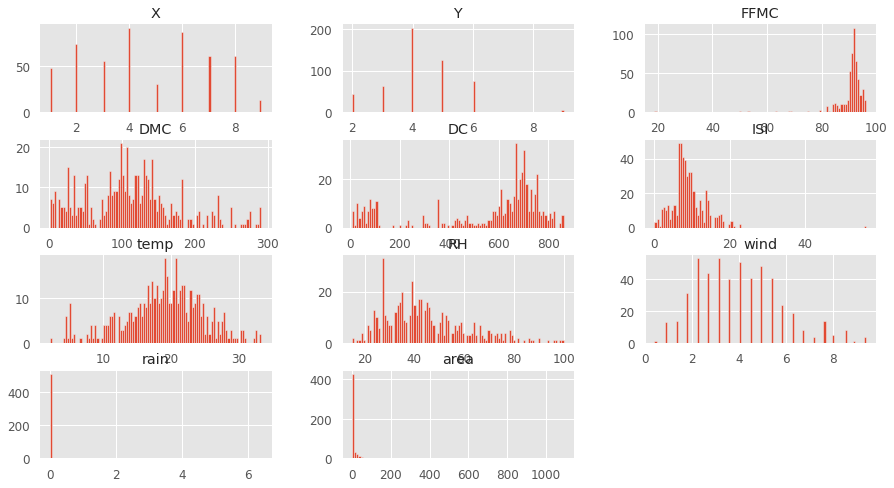

In [426]:
# Visualize histogram of dataset
dataset.hist(figsize= (15,8), bins= 100)
plt.show()

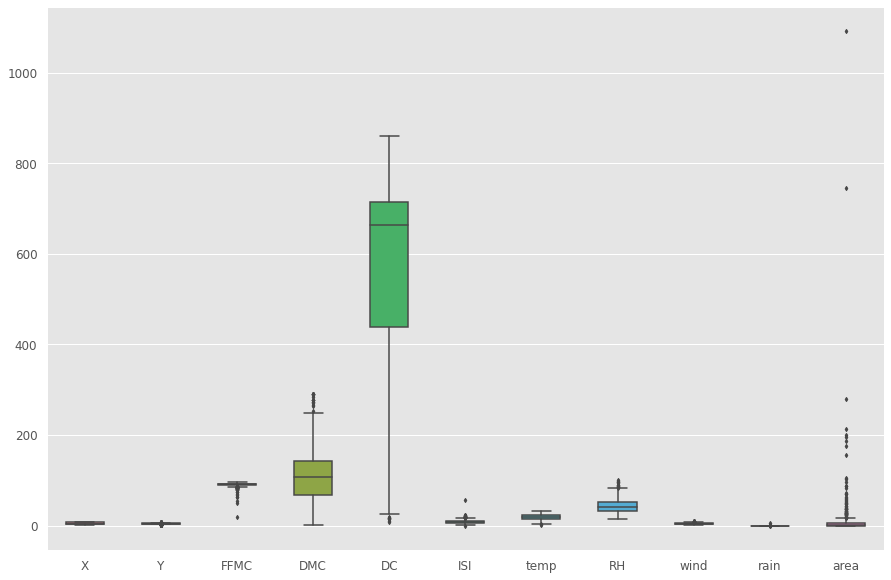

In [427]:
# the histograms show some skewness in the dataset for the following columns; DC, DMC,FFMC,Y,area, wind,rain.
# However, we will study this later quantitatively
# Boxplot of dataframe

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset, width= 0.5,ax=ax,  fliersize=3)

In [428]:
# Once again, we note outliers in a couple of columns and most notably in FFMC, DMC,area

The skewness of FFMC is: -6.575605977178827
The kurtosis of FFMC is: 67.0660405444626


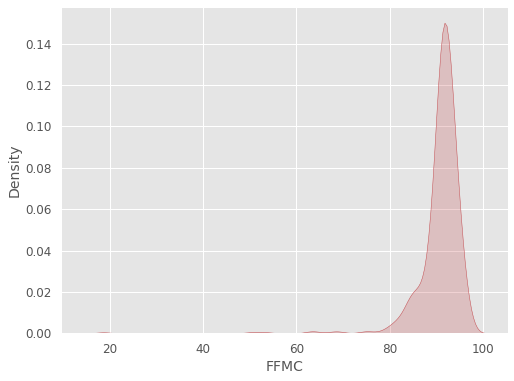

In [429]:
# Statistical analysis on FFMC
print("The skewness of FFMC is:", dataset['FFMC'].skew())
print("The kurtosis of FFMC is:", dataset['FFMC'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['FFMC'], shade=True, color="r")
plt.show()

The skewness of DMC is: 0.5474977944865835
The kurtosis of DMC is: 0.20482178131305062


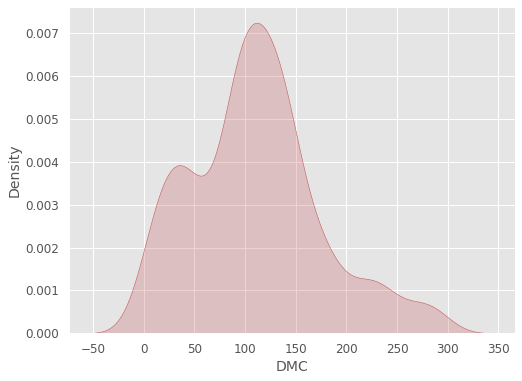

In [430]:
# Statistical analysis on DMC
print("The skewness of DMC is:", dataset['DMC'].skew())
print("The kurtosis of DMC is:", dataset['DMC'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['DMC'], shade=True, color="r")
plt.show()

The skewness of DC is: -1.1004451245649132
The kurtosis of DC is: -0.24524351903325803


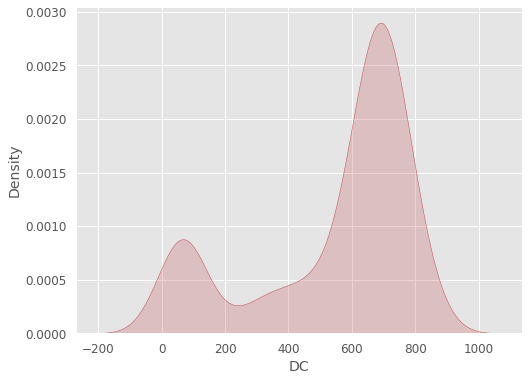

In [431]:
# Statistical analysis on DC
print("The skewness of DC is:", dataset['DC'].skew())
print("The kurtosis of DC is:", dataset['DC'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['DC'], shade=True, color="r")
plt.show()

The skewness of ISI is: 2.5363252664156875
The kurtosis of ISI is: 21.458036504422903


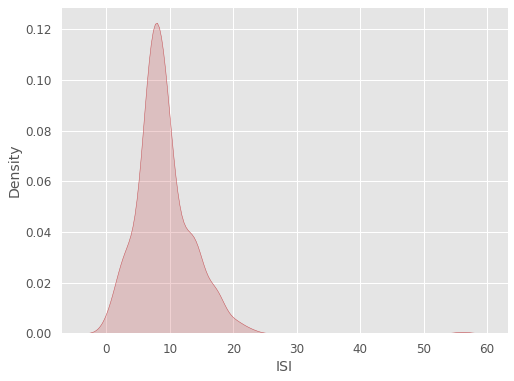

In [432]:
# Statistical analysis on ISI
print("The skewness of ISI is:", dataset['ISI'].skew())
print("The kurtosis of ISI is:", dataset['ISI'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['ISI'], shade=True, color="r")
plt.show()

The skewness of temp is: -0.331172237347285
The kurtosis of temp is: 0.1361655076587991


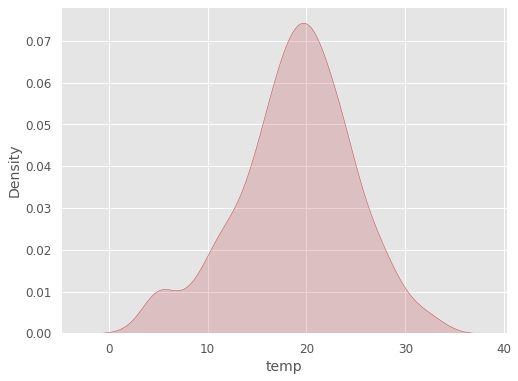

In [433]:
# Statistical analysis on temp
print("The skewness of temp is:", dataset['temp'].skew())
print("The kurtosis of temp is:", dataset['temp'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['temp'], shade=True, color="r")
plt.show()

The skewness of wind is: 0.5710011270000588
The kurtosis of wind is: 0.0543238171099949


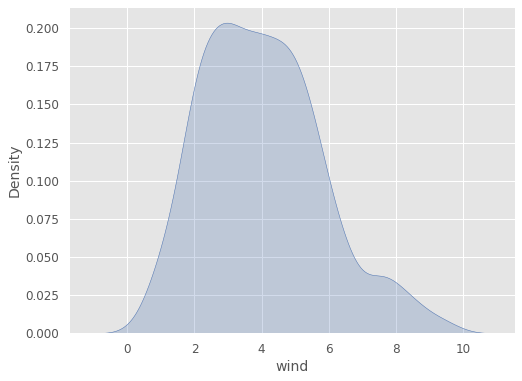

In [434]:
# Statistical analysis on wind
print("The skewness of wind is:", dataset['wind'].skew())
print("The kurtosis of wind is:", dataset['wind'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['wind'], shade=True, color="b")
plt.show()

The skewness of rain is: 19.816343982813166
The kurtosis of rain is: 421.29596360804624


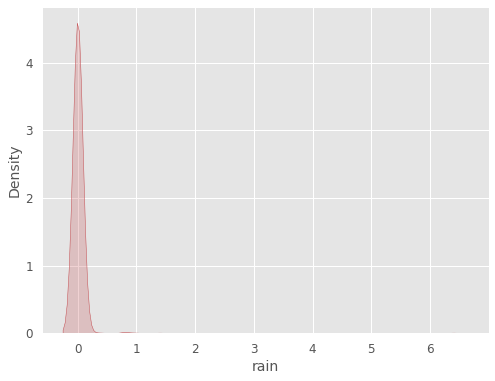

In [435]:
# Statistical analysis on rain
print("The skewness of rain is:", dataset['rain'].skew())
print("The kurtosis of rain is:", dataset['rain'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['rain'], shade=True, color="r")
plt.show()

The skewness of RH is: 0.8629040078552522
The kurtosis of RH is: 0.43818285603905727


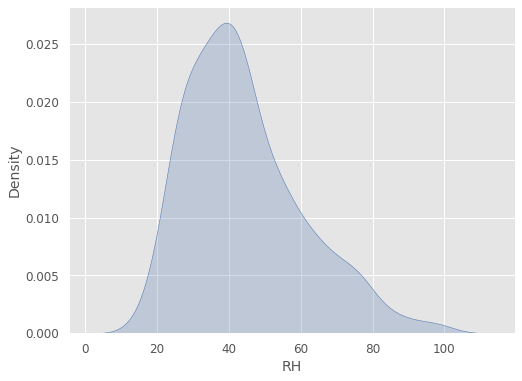

In [436]:
# Statistical analysis on RH
print("The skewness of RH is:", dataset['RH'].skew())
print("The kurtosis of RH is:", dataset['RH'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['RH'], shade=True, color="b")
plt.show()

The skewness of the target variable is: 12.846933533934868
The kurtosis of the target variable is: 194.1407210942299


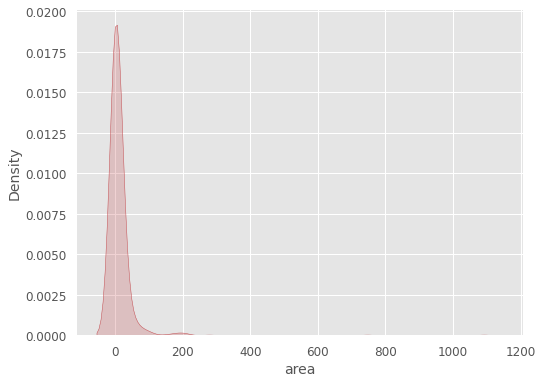

In [437]:
# Statistical analysis on target variable (area)
print("The skewness of the target variable is:", dataset['area'].skew())
print("The kurtosis of the target variable is:", dataset['area'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['area'], shade=True, color="r")
plt.show()

##### A high value of skewness implies the distribution is highly skewed. Specifically, the positive value implies poistively skewed distribution. The large kurtosis value indicates heavy tails/outliers. It is therfore important to transform the variables with high skewness to address the skewness. 

In [438]:
# diagnostic plot to confirm skewness/outliers
def diagnostic_plots(df,variable):
  # functin to plot a histogram and Q-Q plot 
  
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  df[variable].hist()
  
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist = "norm", plot = plt)
  
  #diagnostic_plots(df,'Age') # how to use function
  
  plt.show()

In [439]:
dataset.columns.to_list()

['X',
 'Y',
 'month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area']

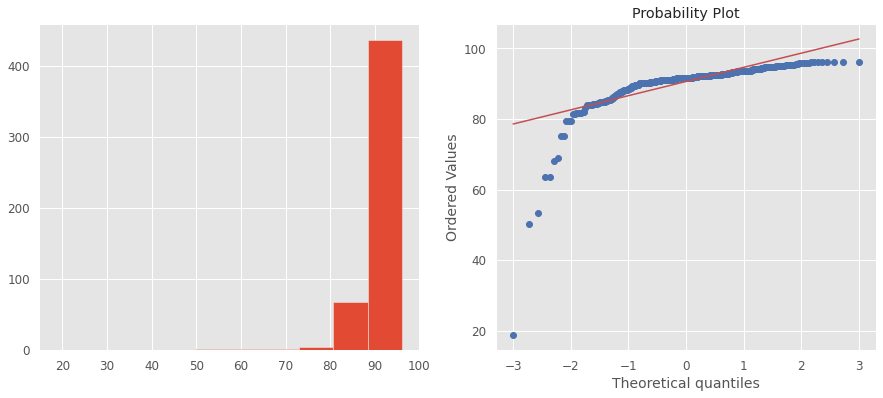

In [440]:
# Confirm skewness with Q-Q plot for FFMC
diagnostic_plots(dataset, 'FFMC')

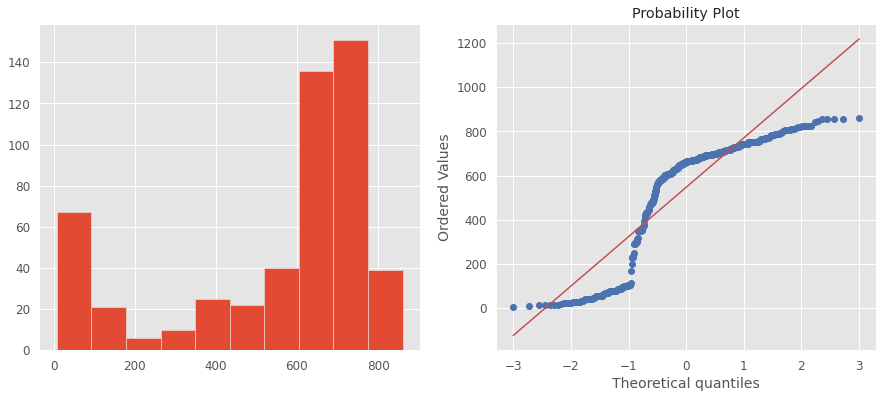

In [441]:
# Confirm skewness with Q-Q plot for DC
diagnostic_plots(dataset, 'DC')

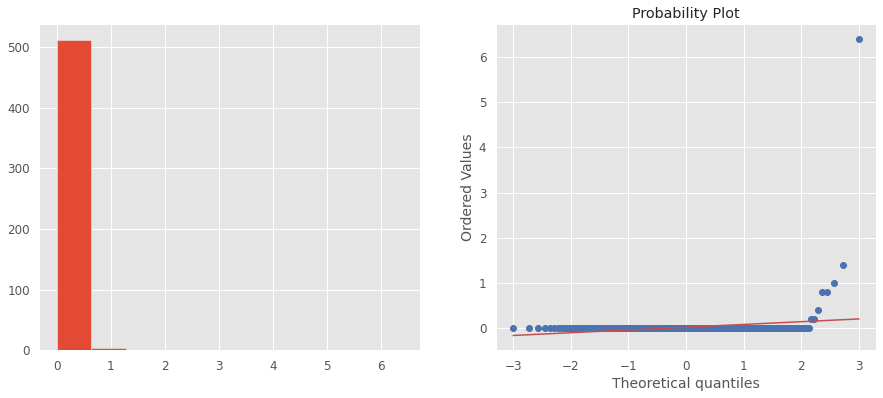

In [442]:
# Confirm skewness with Q-Q plot for RAIN
diagnostic_plots(dataset, 'rain')

In [443]:
# Create bins for area
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

dataset['damage_category'] = dataset['area'].apply(area_cat)
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


In [444]:
# Display categories and counts for created category
dataset['damage_category'].value_counts()


No damage    247
moderate     191
high          41
low           27
very high     11
Name: damage_category, dtype: int64

In [445]:
# create new datframe for month category
months_fire_counts = dataset['month'].value_counts().to_frame()
months_fire_counts.rename(columns=  {'month': 'value_counts'}, inplace = True)

months_fire_counts.index.name = 'months'

months_fire_counts.head()

,value_counts
months,
aug,184
sep,172
mar,54
jul,32
feb,20


In [446]:
# Create a new datframe to work with
df = dataset.copy()
df_a = df.drop(['area','damage_category'], axis=1)
df_a.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [447]:
#  Finding numerical and categorical columns from original dataframe
num_cols = df_a.select_dtypes(exclude ='object').columns.tolist()
cat_cols = df_a.select_dtypes(include='object').columns.tolist()

print(num_cols)
print(cat_cols)

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
['month', 'day']


In [448]:
# Calculate zscores for numerical columns
Zscore = np.abs(zscore(df_a[num_cols]))
Zscore


array([[1.00831277, 0.56986043, 0.80595947, ..., 0.41172435, 1.49861442,
        0.07326831],
       [1.00831277, 0.24400101, 0.00810203, ..., 0.69245628, 1.74175564,
        0.07326831],
       [1.00831277, 0.24400101, 0.00810203, ..., 0.69245628, 1.51828184,
        0.07326831],
       ...,
       [1.00831277, 0.24400101, 1.64008316, ..., 1.57724834, 1.49861442,
        0.07326831],
       [1.58736044, 0.24400101, 0.68095666, ..., 0.14036597, 0.00983371,
        0.07326831],
       [0.57570057, 1.05786246, 2.02087875, ..., 0.81514302, 0.26950853,
        0.07326831]])

In [449]:
# Check for outliers
print(np.where(Zscore >3))

(array([  3,   4,  12,  22,  75,  76,  97, 130, 138, 151, 168, 199, 211,
       243, 266, 299, 304, 312, 379, 379, 402, 411, 420, 469, 475, 480,
       499, 509]), array([7, 7, 2, 5, 1, 1, 2, 2, 1, 1, 8, 2, 7, 9, 5, 2, 7, 2, 2, 7, 1, 8,
       1, 8, 8, 1, 9, 9]))


In [474]:
# Obtain clean dataframe
clean_df = df.copy()
clean_df = clean_df[(Zscore < 3).all(axis = 1)]
print("The shape of the original numerical columns dataframe is :", df[num_cols].shape)
print("The shape of the clean dataframe is :", clean_df.shape)

The shape of the original numerical columns dataframe is : (517, 10)
The shape of the clean dataframe is : (490, 14)


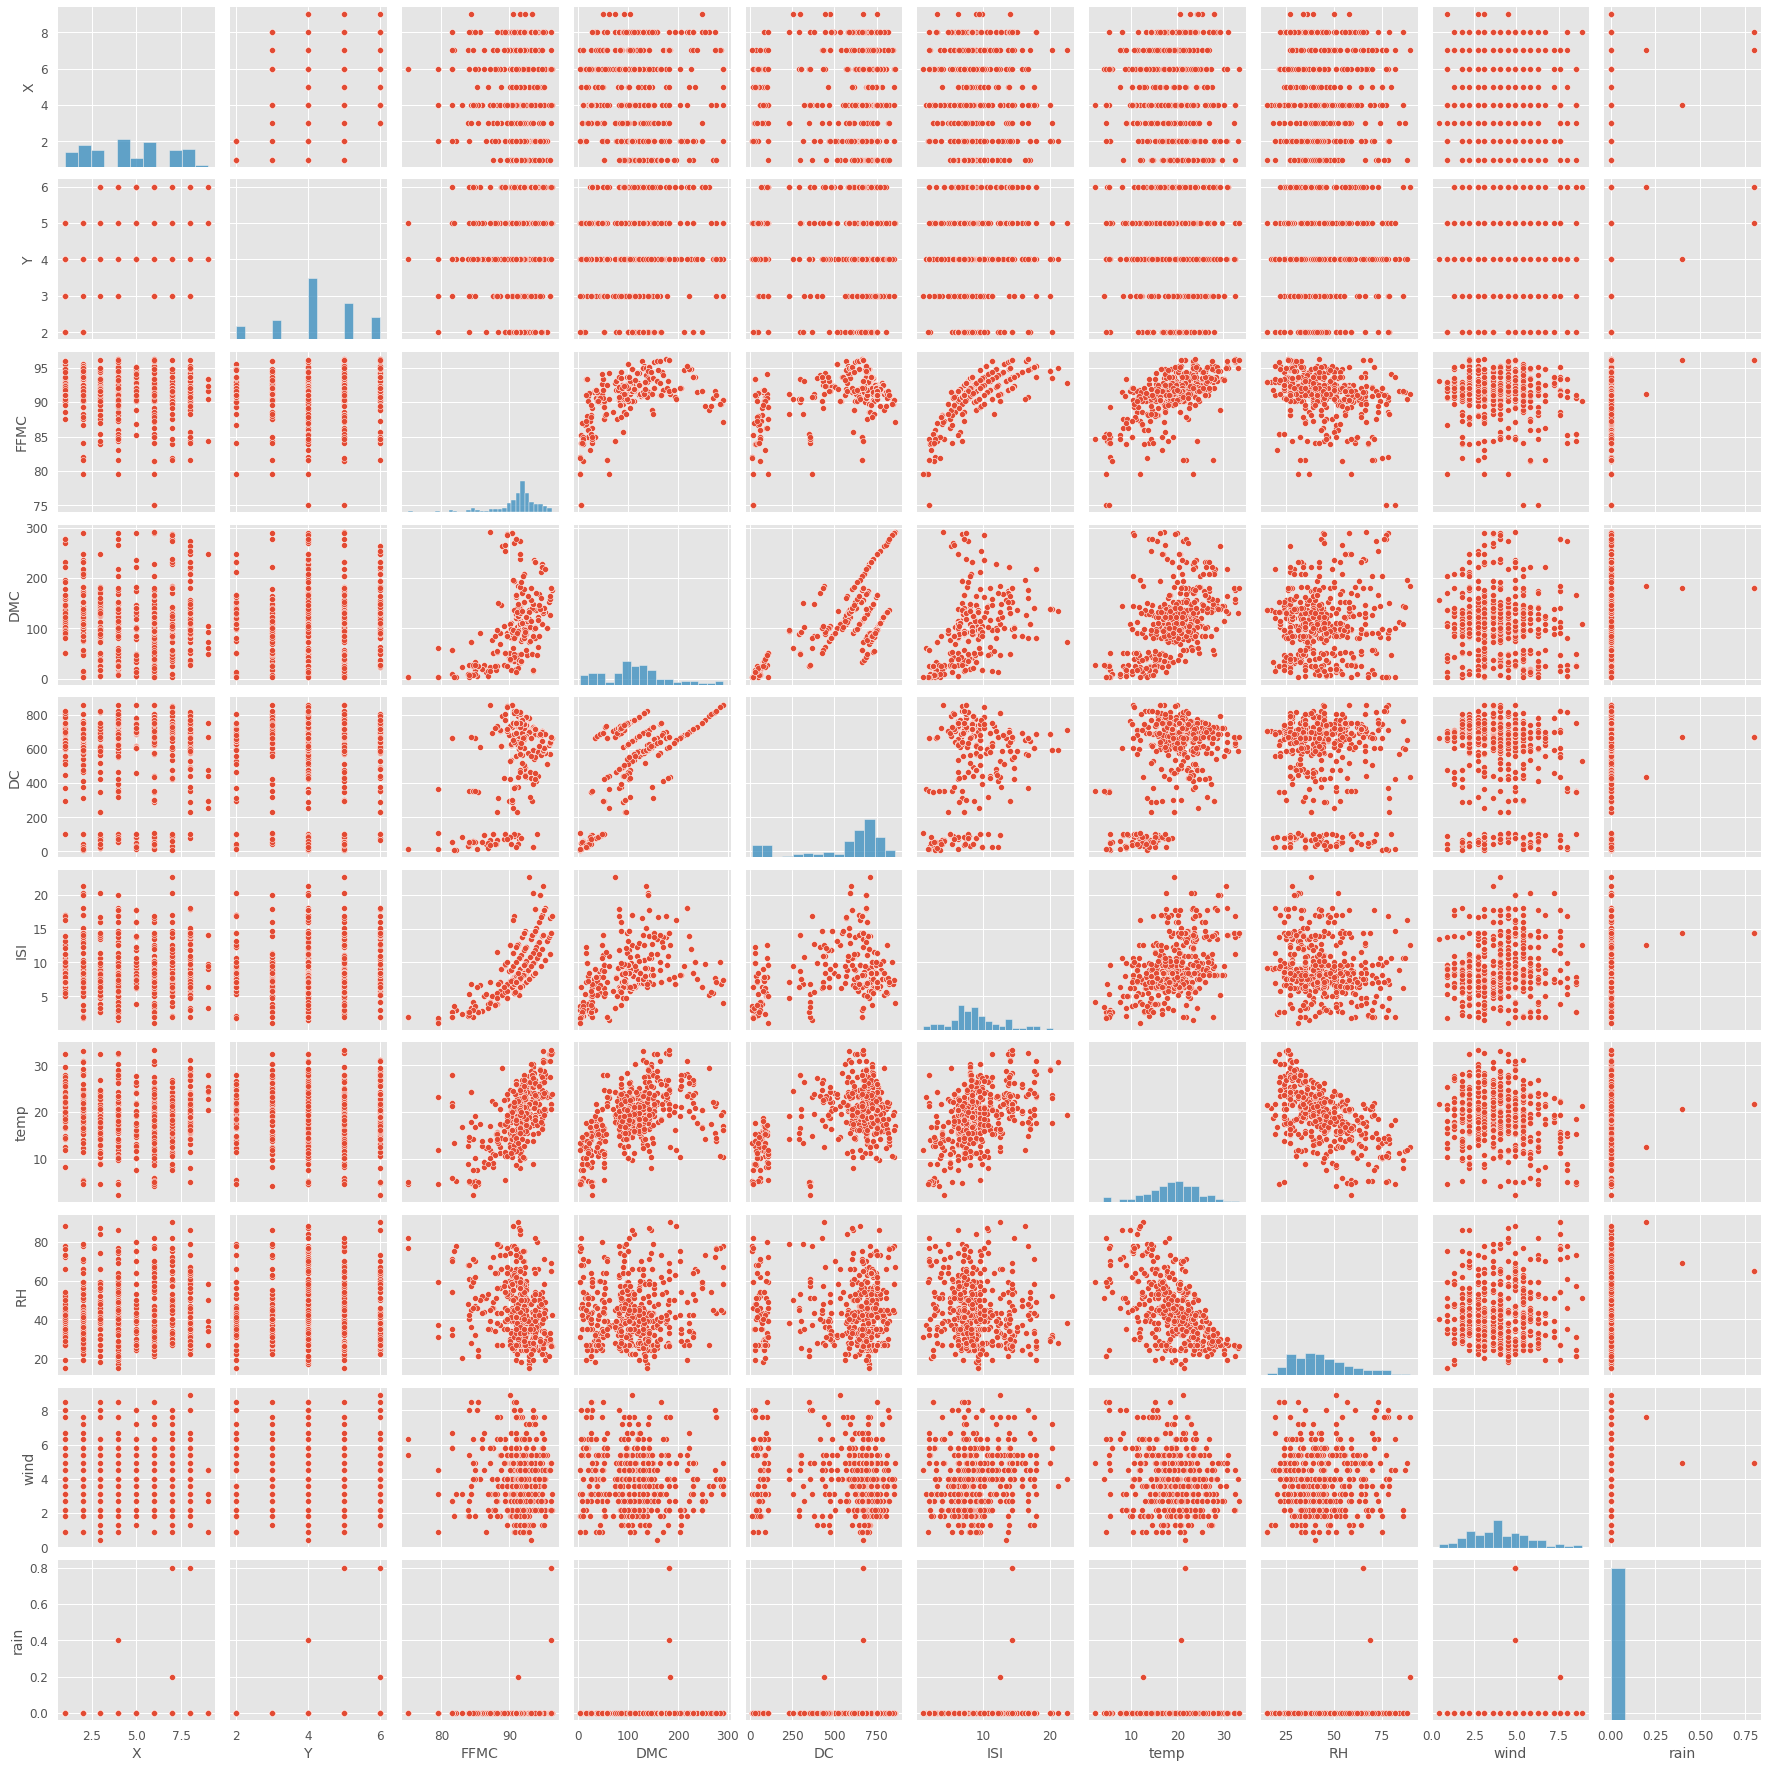

In [451]:
# pairplot on numerical variables
sns.pairplot(clean_df[num_cols])
plt.show()

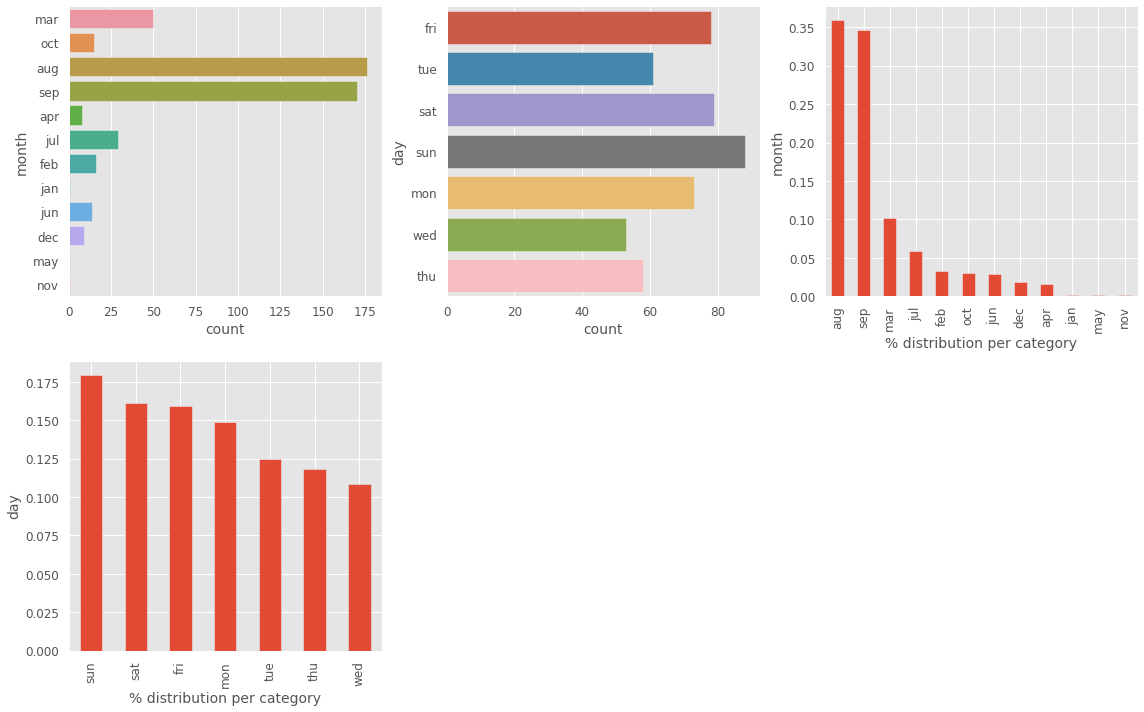

In [452]:
# Visual exploratory analysis on categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,3,i)
    sns.countplot(data=clean_df,y=col)
    plt.subplot(2,3, i+len(cat_cols))
    clean_df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

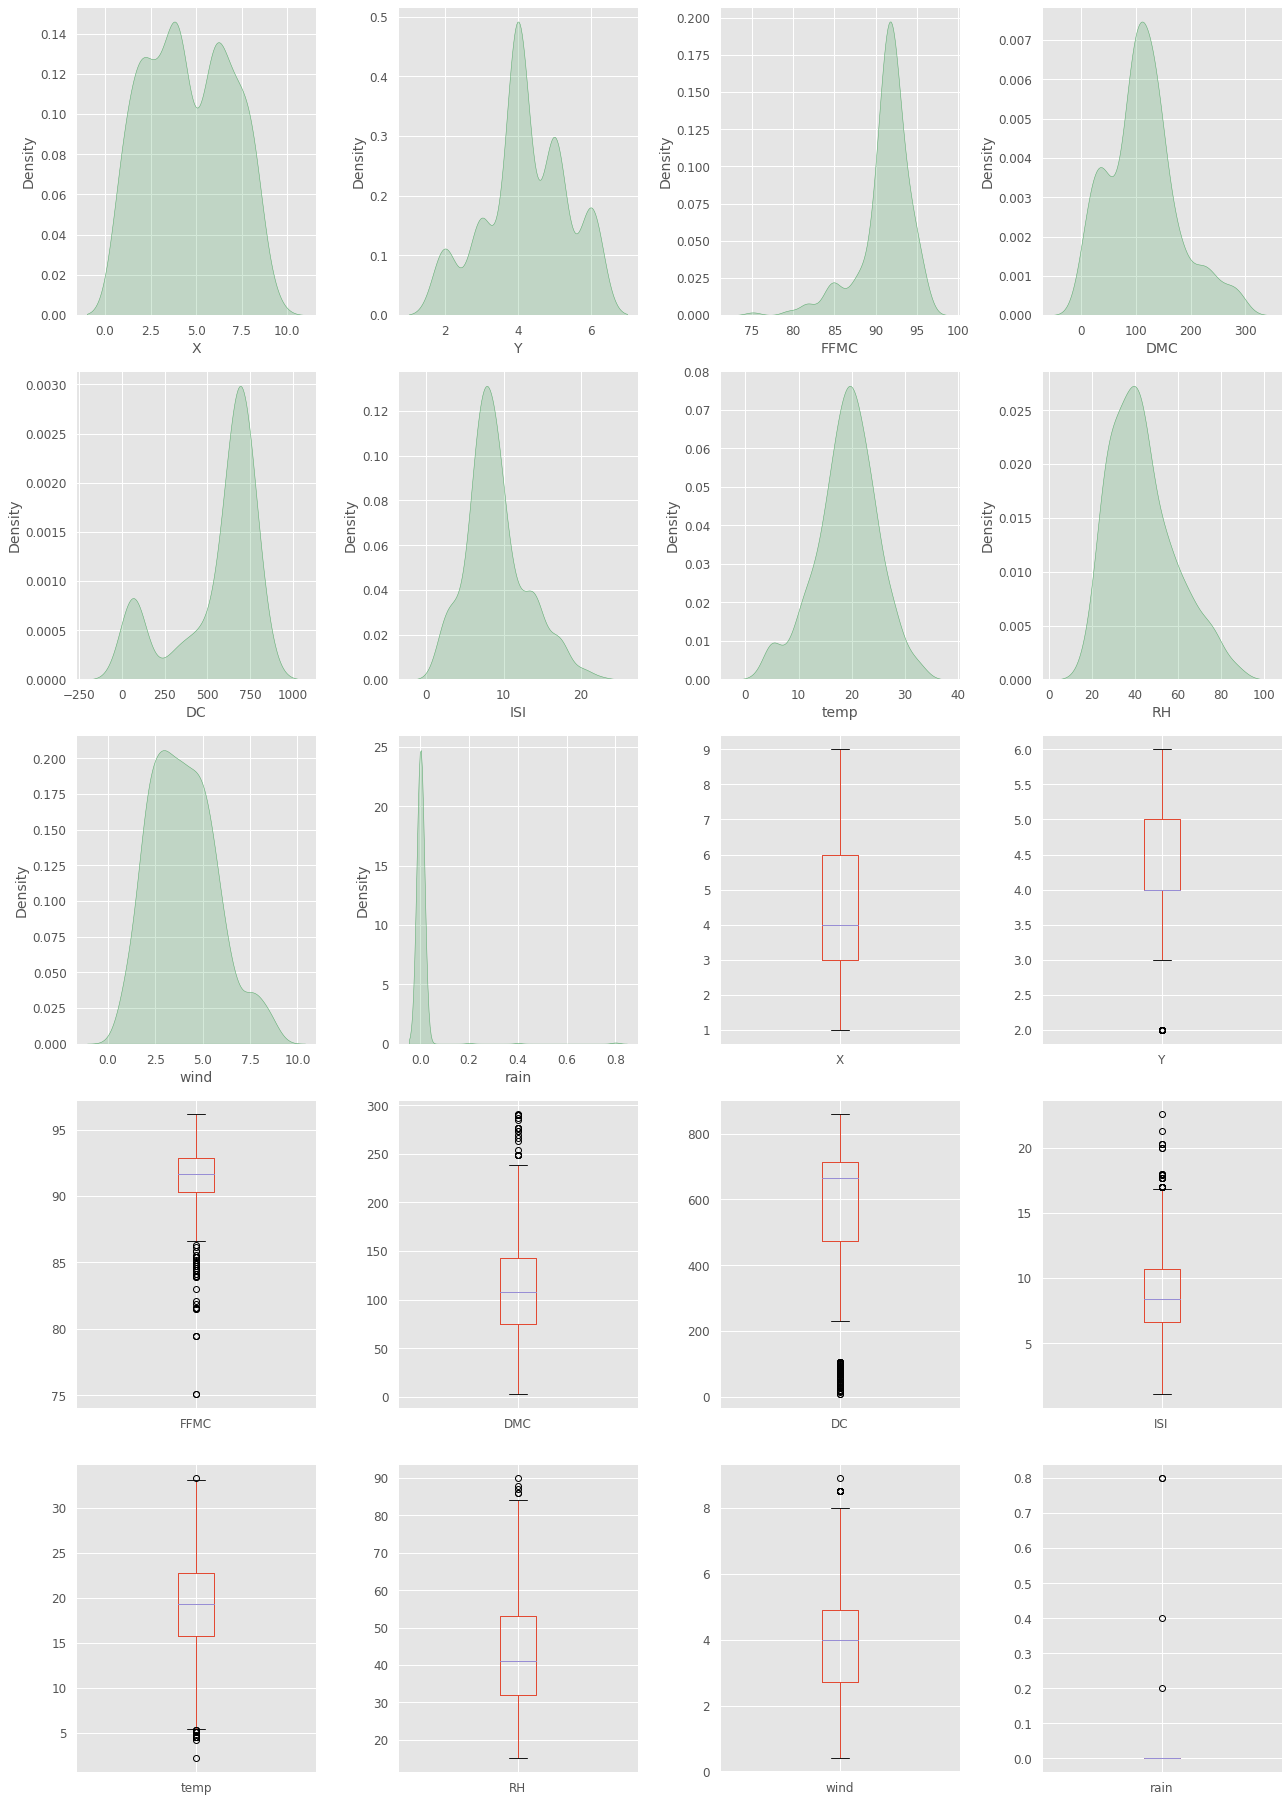

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.055040,-0.207132,-1.684759,0.565136,-1.197102,0.685013,-0.335516,0.70788,0.483784,13.405248
kurtosis,-1.178951,-0.456544,4.272659,0.276964,0.033252,0.463195,0.245199,-0.00483,-0.157754,186.381985


In [453]:
# Visual exploration of numerical colums
plt.figure(figsize= (18,40))
for i,col in enumerate(num_cols,1):
    plt.subplot(8,4,i)
    sns.kdeplot(clean_df[col],color='g',shade=True)
    plt.subplot(8,4,i+len(num_cols))
    clean_df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = clean_df[num_cols]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

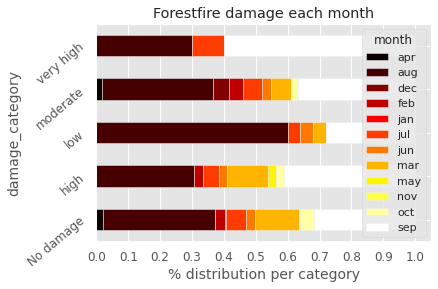

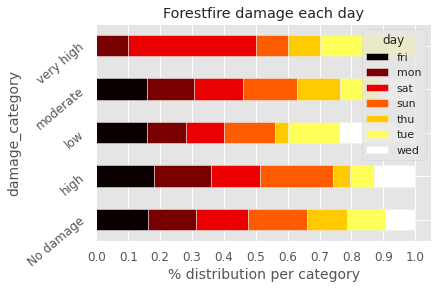

In [454]:
for col in cat_cols:
    cross = pd.crosstab(index=clean_df['damage_category'],columns=clean_df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


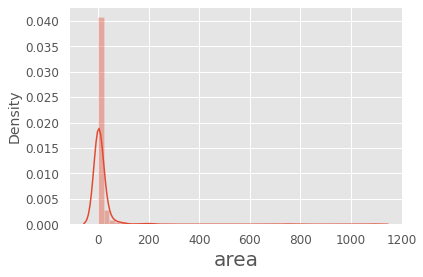

In [455]:
# Explore target variable
sns.distplot(clean_df['area'])
plt.xlabel('area',fontsize=20)
plt.show()

##### The area column is skewed and thus will be transformed using the log transformation

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


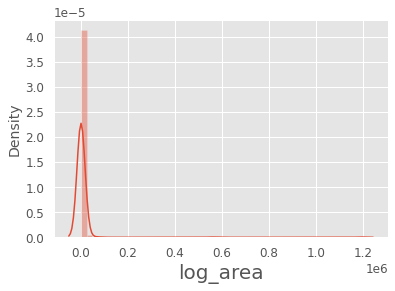

In [456]:
clean_df['log_area'] = np.power(clean_df['area'],2)
sns.distplot(clean_df['log_area'])
plt.xlabel('log_area',fontsize=20)
plt.show()

In [457]:
clean_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category,log_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,No damage,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,No damage,0.0


In [458]:
new_df = clean_df
new_df.drop(columns= ['damage_category','area'], axis = 1, inplace = True)
new_df.reset_index(drop = True, inplace = True)
new_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
4,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [459]:
# Check for correlation matrix
corr= new_df.corr(method= 'spearman')
corr

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
X,1.000000,0.475459,-0.061702,-0.078287,-0.043812,-0.024766,-0.051407,0.049697,0.029213,0.078685,0.069654
Y,0.475459,1.000000,0.009113,0.025389,-0.076097,-0.001291,-0.040792,0.039056,0.008826,0.082715,0.067229
FFMC,-0.061702,0.009113,1.000000,0.481785,0.240846,0.773033,0.593370,-0.325724,-0.049060,0.107356,0.001614
DMC,-0.078287,0.025389,0.481785,1.000000,0.531774,0.407560,0.480884,0.050129,-0.125407,0.118328,0.052010
DC,-0.043812,-0.076097,0.240846,0.531774,1.000000,0.090930,0.281397,0.038087,-0.218856,-0.012521,0.054655
ISI,-0.024766,-0.001291,0.773033,0.407560,0.090930,1.000000,0.419677,-0.181529,0.127552,0.118719,-0.010889
temp,-0.051407,-0.040792,0.593370,0.480884,0.281397,0.419677,1.000000,-0.516344,-0.191269,0.009016,0.061850
RH,0.049697,0.039056,-0.325724,0.050129,0.038087,-0.181529,-0.516344,1.000000,0.034934,0.133565,-0.001679
wind,0.029213,0.008826,-0.049060,-0.125407,-0.218856,0.127552,-0.191269,0.034934,1.000000,0.086271,0.038620
rain,0.078685,0.082715,0.107356,0.118328,-0.012521,0.118719,0.009016,0.133565,0.086271,1.000000,-0.087238


##### The correlation coeffcient between independent and dependent variables is very weak. i.e. less than 0.1 hence a linear regression fit would not be appropriate

In [460]:
#Encoding the data using the Label Encoder

from sklearn.preprocessing import LabelEncoder

month_encoder = LabelEncoder()
day_encoder = LabelEncoder()


new_df['month'] = month_encoder.fit_transform(new_df.month) # label encoding month
new_df['day'] = day_encoder.fit_transform(new_df.day) # label encoding day

In [461]:
# Inspect dataframe
new_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
4,8,6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [462]:
# Split dataframe into features and target
X = new_df.drop(columns = ['log_area'])
y = new_df['log_area']


In [463]:
# Checking for multicolinearity for numerical columns
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [464]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.388001,X
1,1.387981,Y
2,1.565706,month
3,1.064666,day
4,3.357702,FFMC
5,2.734221,DMC
6,2.720038,DC
7,2.623202,ISI
8,2.842281,temp
9,1.900895,RH


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.

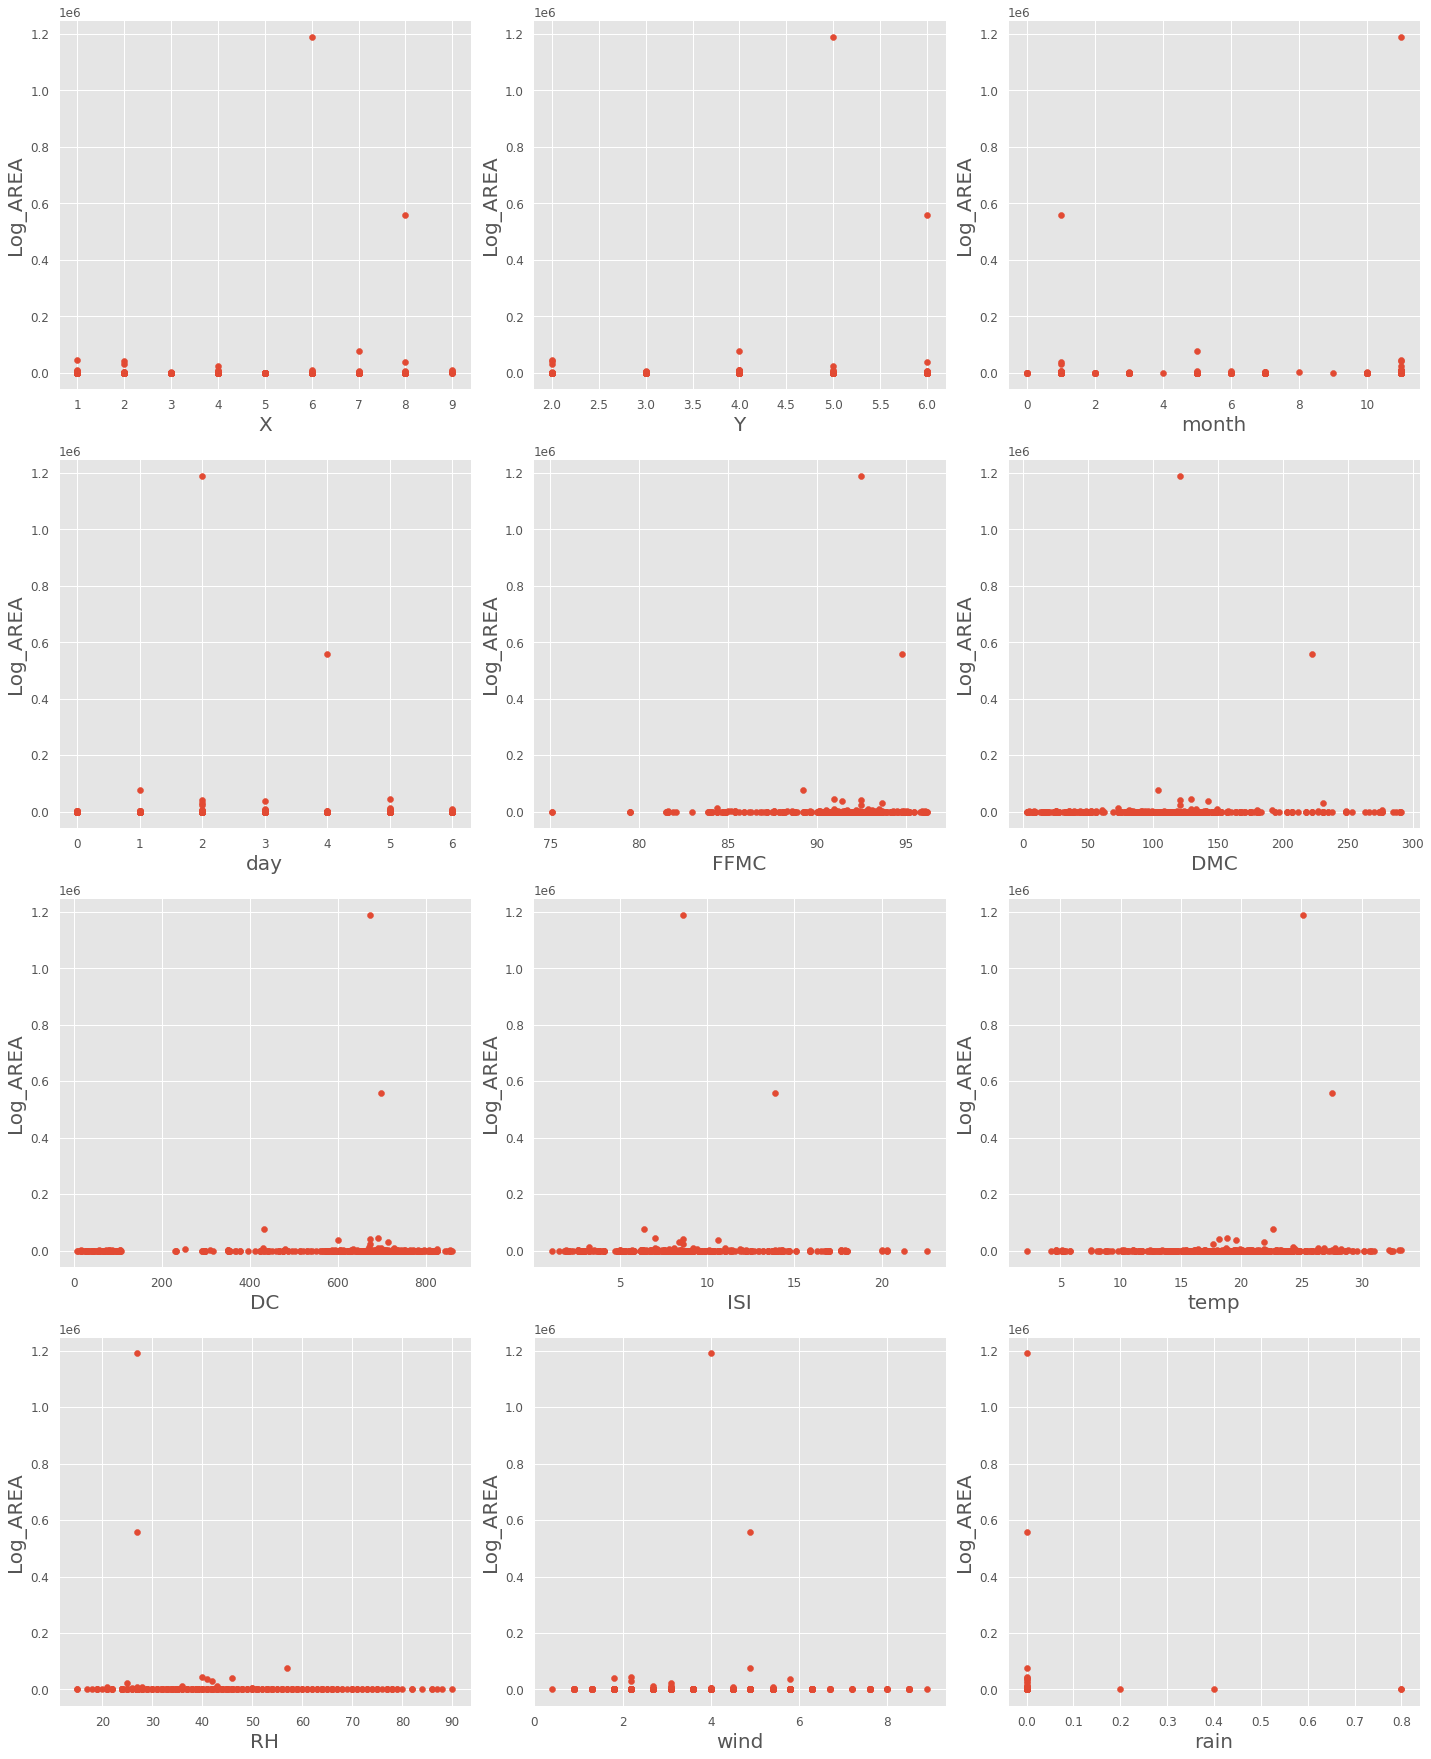

In [465]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Log_AREA',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Machine learning models: Regression

## Model 1: Linear Regression

In [466]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 12)
(98, 12)
(392,)
(98,)


In [475]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(X_train)


In [476]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [477]:
# Evaluate on train set
from sklearn.metrics import r2_score
y_hat = lin_reg_2.predict(X_poly)
print("The r2 score on train set  is : " , str( r2_score(y_train, y_hat)))

The r2 score on train set  is :  0.19036911549854907


In [478]:
# Evaluate on test set
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))
print("The r2 score on test set  is : " , str( r2_score(y_test, y_pred)))

The r2 score on test set  is :  -4.7220253123542295e+19


## Model 2: XGBOOST

In [471]:
# Training XGBoost on the Training set
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators= 200)
reg.fit(X_train, y_train)

[07:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [472]:
# Evaluate on train set
from sklearn.metrics import r2_score
y_hat = reg.predict(X_train)
print("The r2 score on train set  is : " , str( r2_score(y_train, y_hat)))

The r2 score on train set  is :  0.997222784178855


In [473]:
# Evaluate on test set
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
print("The r2 score on test set  is : " , str( r2_score(y_test, y_pred)))

The r2 score on test set  is :  0.004126013249956428
